In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/User/Documents/marketing_and_product_performance.csv')
data.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


<Axes: >

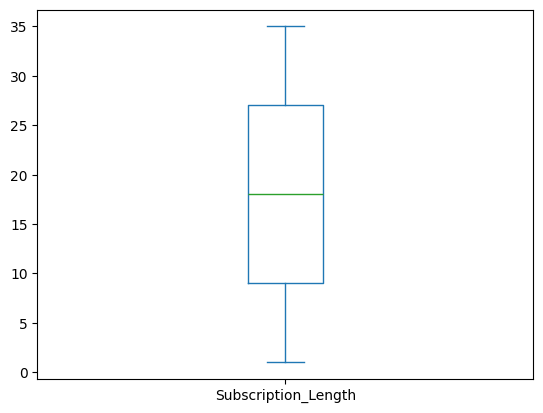

In [2]:
data['Subscription_Length'].plot(kind='box')

- cek data

In [3]:
data.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

tidak ada missing value pada dataset

tujuan

- mengetahui campaign performance berdasarkan customer demografi (subcription tier), kita akan mengukur menggunakan conversion rate, cost per conversion, ROI, dan return on ad spend

prepare data


In [4]:
data['Conversion_Rate']=(data['Conversions']/data['Clicks'])*100
data['Cost per Conversion']=data['Budget']/data['Conversions']
data['Roas']=(data['Revenue_Generated']/data['Budget'])*100

In [5]:
datakum={}
metric=['ROI','Conversion_Rate','Roas','Cost per Conversion']
for i in metric:
    calc_data=data.groupby('Subscription_Tier')[i].mean()
    datakum[i]=calc_data
param=[[[0,2],[2,5]],[(0,5),(5,10)],[(0,300),(300,500)],[(50,100),(0,50)]]
reg={}
for i,j in zip(metric,param):
    reg[i]={}
    for k,l in zip(j,['bad','good']):
        reg[i].update({l:k})


**prepare data untuk doughnut chart**

In [84]:
#hitung subsciption tier
customer_sub=data['Subscription_Tier'].value_counts()
#hitung konsumen lama kali berlangganan
yearly=pd.period_range(start='2014-01',end='2015-01',freq='M')
num_week=len(yearly)*4
def map_cust(x):
    if x==1 or x<num_week/3:
        return 'Monthly'
    elif x>=num_week/3 or x<=num_week/2:
        return 'Quarterly'
    else:
        return 'Anually'
data['Type_lenght']=data['Subscription_Length'].map(map_cust)
#hitung
customer_length=data['Type_lenght'].value_counts()
data_doughnut={
    'tier':customer_sub,
    'length':customer_length
}

In [175]:
#hitung customer common keywords
cust_word=data['Common_Keywords'].value_counts()
cust_sta=data['Customer_Satisfaction_Post_Refund'].value_counts()
#hitung unit sold vs customer tier
unit_data=data.groupby('Subscription_Tier')['Units_Sold'].mean()
unit_data

Subscription_Tier
Basic       101.793033
Premium      99.953410
Standard    100.280000
Name: Units_Sold, dtype: float64

In [134]:
def dougnut_chart(x,y):
    labels=x.index
    value=x.values
    #pctdistance jarak label nilai ke titik tengah autopct adalah format penu;isan
    y.pie(value,labels=labels,autopct='%1.1f%%',pctdistance=0.85,wedgeprops=dict(width=0.3),startangle=35,textprops={'fontsize':8})
   

**membuat dashboard**

- parameter ROI bad 0-2, niali 2 lebih normal
- conversion rate rata-rata bernilai 5-10%
- ROAS rasio pendapatan dan budget 150-300 % bad, 300-500% normal, lebih dari 500% bagus
- cost per conversion bad 50-100 dollar, normal 10-50, dan bagus 0-10 dollar


In [188]:
def plot_graph_1(x,y):
    ykor=[0,0.25,0.5]
    y.set_yticks(ykor)
    br=y.barh(ykor,x,height=0.2,align='center')
    label=x.index.tolist()
    y.set_yticklabels(label,fontsize=6,fontweight='bold')
    y.xaxis.set_visible(False)
    y.spines['top'].set_visible(False)
    y.spines['right'].set_visible(False)
    ylim=y.get_ylim()
    xc=[i.get_width() for i in br]
    for i,j in zip(xc,ykor):
        y.text(i,j,round(i,2),fontsize=6)
    y.set_title(x.name,fontweight='bold')

In [187]:
from matplotlib import pyplot as plt
def plot_graph(x,y):
    ykor=[0,0.25,0.5]
    y.set_yticks(ykor)
    br=y.barh(ykor,x,height=0.2,align='center')
    label=x.index.tolist()
    y.set_yticklabels(label,fontsize=6,fontweight='bold')
    y.xaxis.set_visible(False)
    y.spines['top'].set_visible(False)
    y.spines['right'].set_visible(False)
    ylim=y.get_ylim()
    xc=[i.get_width() for i in br]
    for i,j in zip(xc,ykor):
        y.text(i,j,round(i,2),fontsize=6)
    #membuat region pada bar
    clasi=reg[x.name].keys()
    for i,j in zip(clasi,[0.2,0.1]):
        y.fill_between(reg[x.name][i],ylim[0],ylim[1],color='black',alpha=j)
   
   

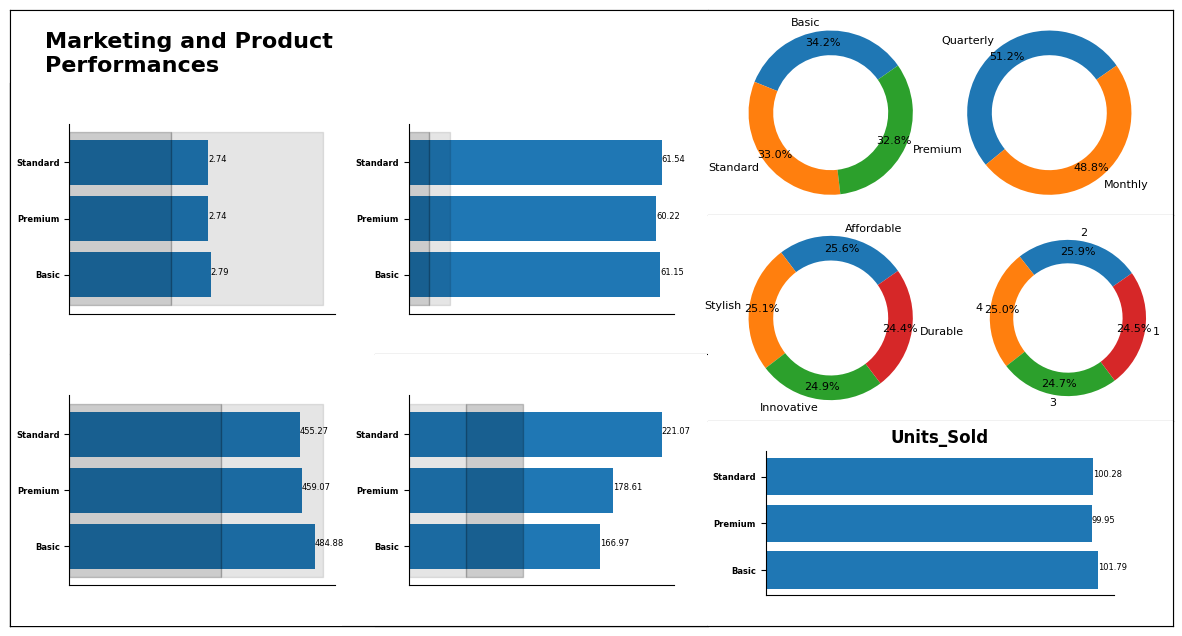

In [208]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
fig,ax=plt.subplots(figsize=(15,8))
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
#dibagi dua
gs=gridspec.GridSpec(1,2,width_ratios=[0.60,0.4],wspace=0)
#box kiri
ax_l=fig.add_subplot(gs[0])
ax_l.spines['right'].set_visible(False)
ax_l.yaxis.set_visible(False)
ax_l.xaxis.set_visible(False)
ax_l.text(0.05,0.9,'Marketing and Product \nPerformances',fontsize=16,fontweight='bold')
#subplot di dalaom box left
gs_l=gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gs[0],height_ratios=[0.03,0.97])
ax_l2=fig.add_subplot(gs_l[1])
ax_l2.spines['top'].set_visible(False)
ax_l2.spines['right'].set_visible(False)
ax_l2.yaxis.set_visible(False)
ax_l2.xaxis.set_visible(False)
gs_l_nested=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=gs_l[1],width_ratios=[0.5,0.5],wspace=0.1,hspace=0)
axes=[fig.add_subplot(gs_l_nested[i])for i in range (4)]
for i,j in zip(datakum.keys(),axes):
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    j.yaxis.set_visible(False)
    j.xaxis.set_visible(False)
    j.spines['top'].set_visible(False)
    j.spines['right'].set_visible(False)
    if i=='ROI' or i=='Roas':
        ax2=inset_axes(j,width="80%",height="70%",loc='center right')
        plot_graph(datakum[i],ax2)
        j.spines['bottom'].set_visible(False)
        j.spines['right'].set_visible(False)
    
    else:
        ax2=inset_axes(j,width="80%",height="70%",loc='center')
        plot_graph(datakum[i],ax2)
        j.spines['left'].set_visible(False)
#bok kanan akan dibagi menjadi 3 baris  
gs_right_nested=gridspec.GridSpecFromSubplotSpec(3,1,height_ratios=[0.3,0.3,0.3],subplot_spec=gs[1],hspace=0)
ax_r_1=fig.add_subplot(gs_right_nested[0])
ax_r_1.spines['left'].set_visible(False)
ax_r_1.yaxis.set_visible(False)
ax_r_1.xaxis.set_visible(False)
axes_dougnut=[inset_axes(ax_r_1,width="50%",height="100%",loc=i)  for i in ['center left','center right']]
for i,j in zip(data_doughnut.keys(),axes_dougnut):
    dougnut_chart(data_doughnut[i],j)
#baris 2 box kanan
ax_r_2=fig.add_subplot(gs_right_nested[1])
ax_r_2.spines['top'].set_visible(False)
ax_r_2.yaxis.set_visible(False)
ax_r_2.spines['left'].set_visible(False)
ax_r_2.xaxis.set_visible(False)
axes_dougnut_2=inset_axes(ax_r_2,width="50%",height="100%",loc='center left')
axes_dougnut_3=inset_axes(ax_r_2,width="42%",height="100%",loc='center right')
dougnut_chart(cust_word,axes_dougnut_2)
axes_dougnut_3.set_position([0.9,0.8,1,1])
dougnut_chart(cust_sta,axes_dougnut_3)
#baris tiga box kanan
ax_r_3=fig.add_subplot(gs_right_nested[2])
ax_r_3.spines['top'].set_visible(False)
ax_r_3.spines['left'].set_visible(False)
ax_r_3.yaxis.set_visible(False)
ax_r_3.xaxis.set_visible(False)
axes_unit=inset_axes(ax_r_3,width="75%",height="70%",loc='center')
plot_graph_1(unit_data,axes_unit)